In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

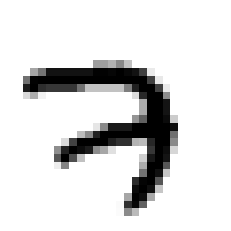

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

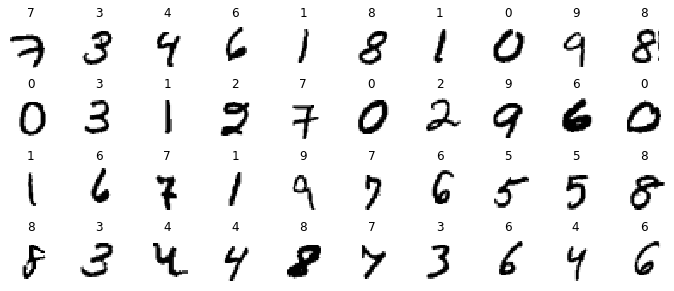

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Metal device set to: Apple M1


2022-05-24 17:02:56.825063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 17:02:56.825367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

2022-05-24 17:03:03.749126: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-24 17:03:03.840625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1718/1719 [============================>.] - ETA: 0s - loss: 0.5959 - accuracy: 0.8482

2022-05-24 17:03:16.489825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 14s 7ms/step - loss: 0.5957 - accuracy: 0.8482 - val_loss: 0.3045 - val_accuracy: 0.9152
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2894 - accuracy: 0.9171 - val_loss: 0.2409 - val_accuracy: 0.9318
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2386 - accuracy: 0.9324 - val_loss: 0.2020 - val_accuracy: 0.9430
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2044 - accuracy: 0.9414 - val_loss: 0.1813 - val_accuracy: 0.9492
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1796 - accuracy: 0.9490 - val_loss: 0.1607 - val_accuracy: 0.9554
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1599 - accuracy: 0.9548 - val_loss: 0.1466 - val_accuracy: 0.9616
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1438 - accuracy: 0.9599 - val_loss: 0.1348 - val_accuracy: 0.9

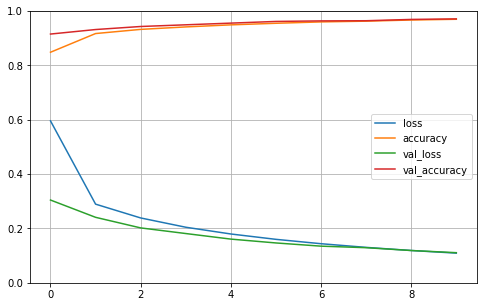

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1144 - accuracy: 0.9647


[0.11443734914064407, 0.9647000432014465]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2022-05-24 17:05:05.151367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]],
      dtype=float32)

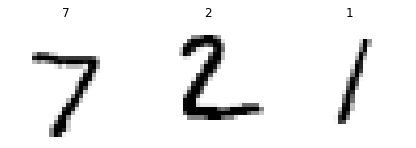

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [20]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(300, activation="relu"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(100, activation="relu"),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),
    
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 784)               0         
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_5 (Batc  (None, 300)              1200      
 hNormalization)                                      

In [21]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


2022-05-24 17:06:38.912243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.9252 - accuracy: 0.7156

2022-05-24 17:06:57.626319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 20s 11ms/step - loss: 0.9252 - accuracy: 0.7156 - val_loss: 0.4154 - val_accuracy: 0.9036
Epoch 2/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4993 - accuracy: 0.8526 - val_loss: 0.2993 - val_accuracy: 0.9282
Epoch 3/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4050 - accuracy: 0.8778 - val_loss: 0.2435 - val_accuracy: 0.9396
Epoch 4/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3526 - accuracy: 0.8937 - val_loss: 0.2171 - val_accuracy: 0.9456
Epoch 5/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3134 - accuracy: 0.9065 - val_loss: 0.1947 - val_accuracy: 0.9508
Epoch 6/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.2902 - accuracy: 0.9105 - val_loss: 0.1773 - val_accuracy: 0.9530
Epoch 7/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2693 - accuracy: 0.9189 - val_loss: 0.1620 - val_accura

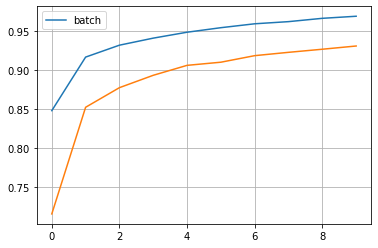

In [27]:
plt.plot(pd.DataFrame(history.history["accuracy"]), label="batch")
plt.plot(pd.DataFrame(history2.history["accuracy"]))
plt.grid(True)
plt.legend()
plt.show()